In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('dataset/UnderstandingBusiness/UW_Understanding_Business_LOT.csv')

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_26386/1723780546.py:1: DtypeWarning: Columns (4,10,11,12,13,14,16,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/UnderstandingBusiness/UW_Understanding_Business_LOT.csv')


In [4]:
df.shape

(1323762, 34)

In [5]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,NaN,NaN,SEO,Mobile App,ios 17.3.1,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,NaN,NaN,Direct,Mobile App,ios 17.6.1,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,NaN,NaN,Direct,Mobile App,ios 18.0,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,NaN,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df['PAGE'] = df['PAGE'].fillna(0)
df['PAGE_VIEWS'] = df['PAGE_VIEWS'].fillna(0)
df['STAY_LENGTH'] = df['STAY_LENGTH'].fillna(0)
df['OPERATING_SYSTEMS'] = df['OPERATING_SYSTEMS'].apply(lambda x: x.split(' ')[0])

In [7]:
df.head()

,source_type,TIMESTAMP,COOKIE_ID,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,MARKET_LANGUAGE,CUSTOMER_LOYALTY,DEPARTURE_DATE,ARRIVAL_DATE,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,2023-08-15 18:10:18,90160409479417649411999102181002937619,563,0,0.0,SEO,Mobile App,ios,PL_PL,loyal,2023-09-13,2022-11-13,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,2023-08-07 08:07:50,83506423751136985820103526870163297871,72,0,0.0,Direct,Mobile App,ios,PL_PL,return,2023-08-09,2022-11-09,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,2023-07-09 12:27:11,78236612428921115877508527232487027464,95,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-15,2022-11-20,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,2023-07-20 07:15:18,86513654906858836814951255651058285578,296,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-07-25,2022-11-25,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,2023-08-22 05:27:37,07263717780177747617979091720349832062,127,0,0.0,Direct,Mobile App,ios,PL_PL,loyal,2023-08-29,NaN,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323762 entries, 0 to 1323761
Data columns (total 29 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   source_type                   1323762 non-null  object 
 1   VISIT_NUMBER                  1323762 non-null  int64  
 2   PAGE                          1323762 non-null  object 
 3   PAGE_VIEWS                    1323762 non-null  float64
 4   MARKETING_CHANNEL             1323762 non-null  object 
 5   PLATFORM_TYPE                 1323762 non-null  object 
 6   OPERATING_SYSTEMS             1323762 non-null  object 
 7   CUSTOMER_LOYALTY              35879 non-null    object 
 8   ORIGIN_AND_DESTINATION_PORTS  35599 non-null    object 
 9   RANGE                         35591 non-null    object 
 10  STAY_LENGTH                   1323762 non-null  float64
 11  FLIGHT_TYPE                   35591 non-null    object 
 12  NUMBER_OF_SEGMENTS          

In [8]:
categorical_cols = [
    'source_type', 'MARKETING_CHANNEL', 'PLATFORM_TYPE', 'ORIGIN_AND_DESTINATION_PORTS',
    'OPERATING_SYSTEMS', 'CUSTOMER_LOYALTY', 'FLIGHT_TYPE',
    'CLASS_TYPE', 'FARE_FAMILY', 'RANGE', 'FLOW_TYPE'
]

numerical_cols = [
    'VISIT_NUMBER', 'PAGE', 'PAGE_VIEWS',
    'STAY_LENGTH', 'NUMBER_OF_SEGMENTS', 'DAYS_TO_DEPARTURE',
    'ADULTS', 'TEENS', 'CHILDS',
    'INFANTS', 'BOOKING_CONFIRMATION', 'BOOKING_CHANGE_CONFIRMATION'
]
# numerical_cols = ['DAYS_TO_DEPARTURE', 'NUMBER_OF_SEGMENTS']
# numerical_cols = [col for col in df.columns if col not in categorical_cols and df[col].dtype in ['int64', 'float64']]

exclude_cols = ['COOKIE_ID', 'TIMESTAMP', 'MARKET_LANGUAGE', 'DEPARTURE_DATE', 'ARRIVAL_DATE']

ancillaries = [
    'PAID_SEATS', 'ONBOARD_MEALS', 
    'EXTRA_BAGGAGE', 'BUSINESS_LOUNGE', 
    'SPECIAL_EQUIPMENT', 'FAST_TRACK'
]

In [28]:
numerical_cols = [col for col in df.columns if col not in categorical_cols+ancillaries and pd.api.types.is_numeric_dtype(df[col])]

In [29]:
numerical_cols

['VISIT_NUMBER',
 'PAGE_VIEWS',
 'STAY_LENGTH',
 'NUMBER_OF_SEGMENTS',
 'DAYS_TO_DEPARTURE',
 'ADULTS',
 'TEENS',
 'CHILDS',
 'INFANTS',
 'BOOKING_CONFIRMATION',
 'BOOKING_CHANGE_CONFIRMATION']

In [30]:
# df.loc[:, ~df.columns.isin(exclude_cols)] = df.loc[:, ~df.columns.isin(exclude_cols)].fillna(0)
df = df.loc[:, ~df.columns.isin(exclude_cols)]

In [31]:
df.source_type.unique()

array(['TRANSACTION', 'ACTIVITY'], dtype=object)

In [32]:
df.head(20).to_csv('dataset/UnderstandingBusiness/Sample_UW_Understanding_Business_LOT_head.csv', index=False)

In [33]:
# Check basic statistics of the dataset
eda_summary = df.describe(include='all')
eda_summary.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
source_type,1323762,2,ACTIVITY,1287883,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VISIT_NUMBER,1323762.0,NaN,NaN,NaN,97.58109,187.40431,1.0,5.0,24.0,100.0,1794.0
PAGE,1323762,13081,www.lot.com/pl/pl/book/availability/departure,104049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAGE_VIEWS,1323762.0,NaN,NaN,NaN,0.977701,0.211543,0.0,1.0,1.0,1.0,25.0
MARKETING_CHANNEL,1323762,9,Direct,399506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLATFORM_TYPE,1323762,3,Regular Web,845914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OPERATING_SYSTEMS,1323762,7,windows,651813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CUSTOMER_LOYALTY,35879,3,loyal,17728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ORIGIN_AND_DESTINATION_PORTS,35599,2625,WAW-LHR,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RANGE,35591,3,Short Haul,25354,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
na_values = df.isna().sum()
na_values[na_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

NUMBER_OF_SEGMENTS              1288173
DAYS_TO_DEPARTURE               1288172
RANGE                           1288171
FLIGHT_TYPE                     1288171
ORIGIN_AND_DESTINATION_PORTS    1288163
CUSTOMER_LOYALTY                1287883
PAID_SEATS                      1287883
BOOKING_CONFIRMATION            1287883
FAST_TRACK                      1287883
SPECIAL_EQUIPMENT               1287883
BUSINESS_LOUNGE                 1287883
EXTRA_BAGGAGE                   1287883
ONBOARD_MEALS                   1287883
CLASS_TYPE                      1287883
FLOW_TYPE                       1287883
FARE_FAMILY                     1287883
INFANTS                         1287883
CHILDS                          1287883
TEENS                           1287883
ADULTS                          1287883
BOOKING_CHANGE_CONFIRMATION     1287883
dtype: int64

In [36]:
df.MARKETING_CHANNEL.unique()

array(['SEO', 'Direct', 'Social Media', 'SEM', 'Email', 'Remarketing',
       'Programmatic', 'Display', 'QR Code'], dtype=object)

In [37]:
for dtype in df.dtypes:
    if dtype == 'object':
        print(df.select_dtypes(include=[dtype]).nunique())

source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                            13081
MARKETING_CHANNEL                   9
PLATFORM_TYPE                       3
OPERATING_SYSTEMS                   7
CUSTOMER_LOYALTY                    3
ORIGIN_AND_DESTINATION_PORTS     2625
RANGE                               3
FLIGHT_TYPE                         3
CLASS_TYPE                          3
FARE_FAMILY                         3
FLOW_TYPE                           2
dtype: int64
source_type                         2
PAGE                    

In [38]:
# Check for class imbalance in the target columns
ancillary_class_distribution = df[ancillaries].mean()
ancillary_class_distribution.sort_values(ascending=False)

PAID_SEATS           28.478985
EXTRA_BAGGAGE        13.158268
SPECIAL_EQUIPMENT     0.816341
FAST_TRACK            0.626396
ONBOARD_MEALS         0.581447
BUSINESS_LOUNGE       0.229430
dtype: float64

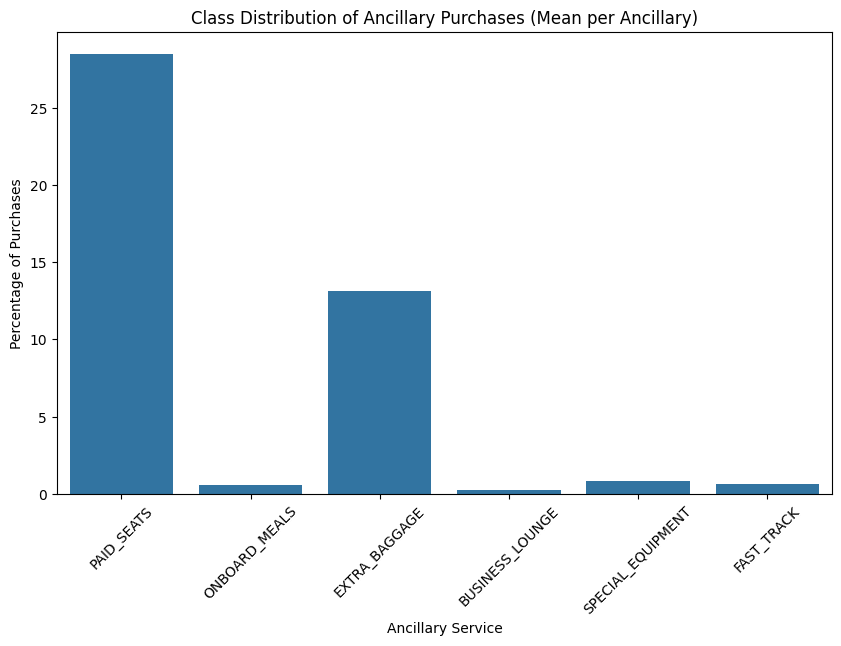

In [39]:
# Visualize the class distribution of target variables
plt.figure(figsize=(10, 6))
sns.barplot(x=ancillary_class_distribution.index, y=ancillary_class_distribution.values)
plt.title('Class Distribution of Ancillary Purchases (Mean per Ancillary)')
plt.ylabel('Percentage of Purchases')
plt.xlabel('Ancillary Service')
plt.xticks(rotation=45)
plt.show()

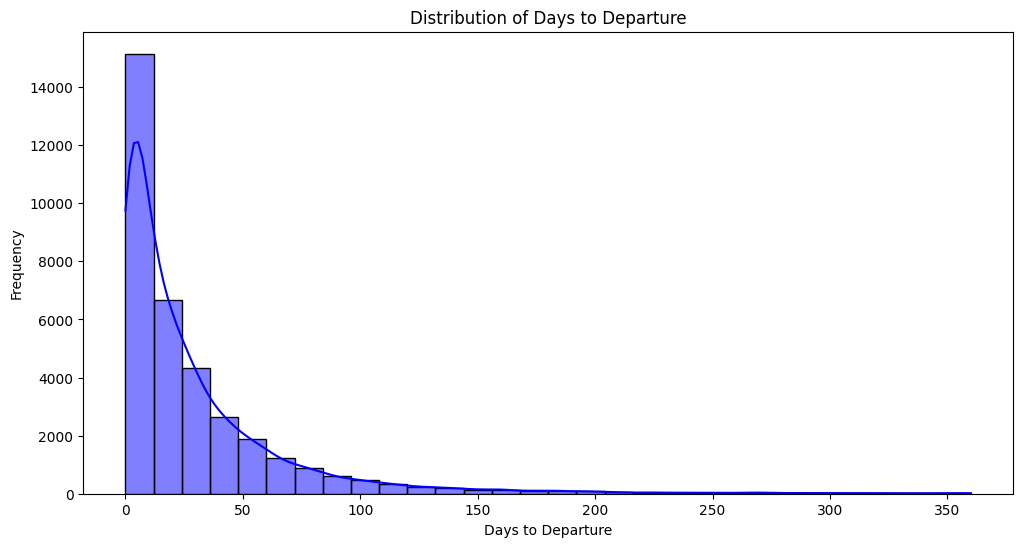

In [40]:
# Visualize the distribution of some important features
plt.figure(figsize=(12, 6))
sns.histplot(df['DAYS_TO_DEPARTURE'], kde=True, color='blue', bins=30)
plt.title('Distribution of Days to Departure')
plt.xlabel('Days to Departure')
plt.ylabel('Frequency')
plt.show()


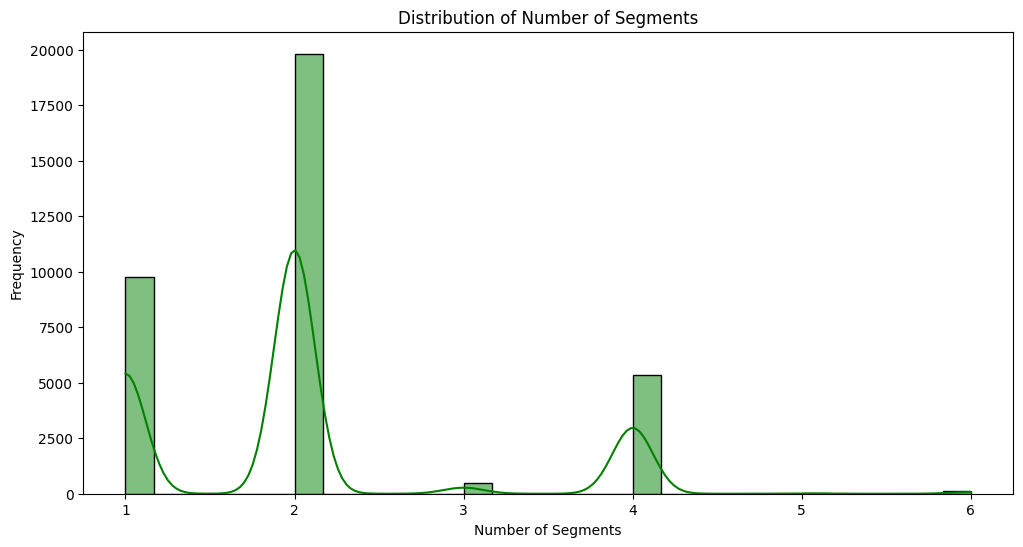

In [41]:
plt.figure(figsize=(12, 6))
sns.histplot(df['NUMBER_OF_SEGMENTS'], kde=True, color='green', bins=30)
plt.title('Distribution of Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Frequency')
plt.show()

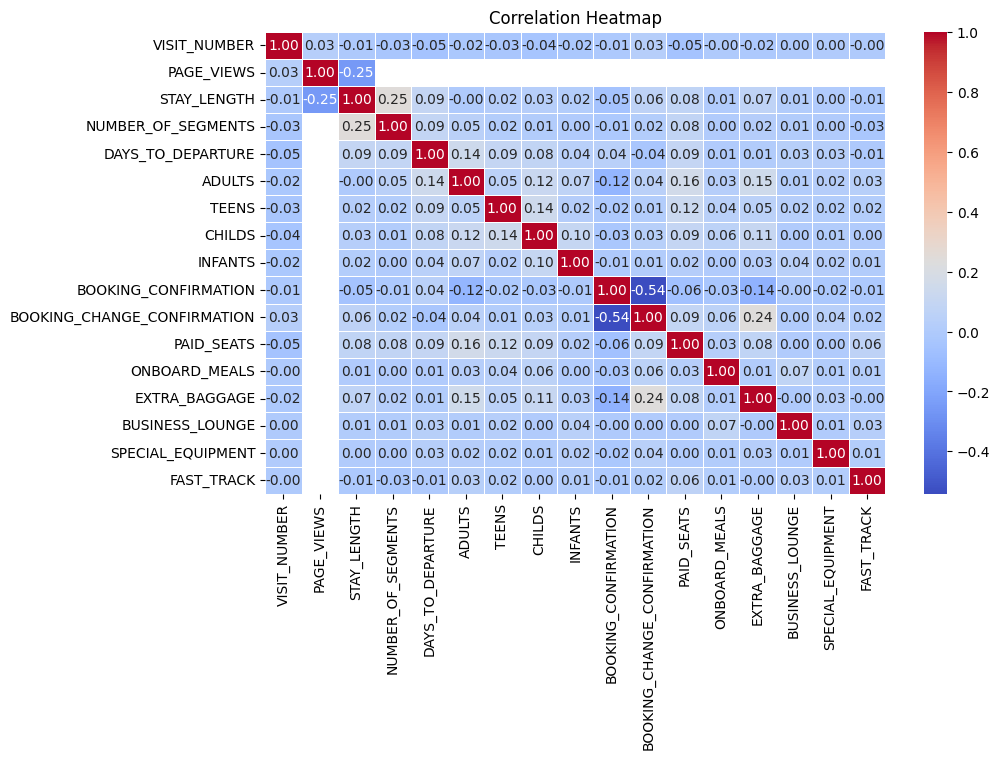

In [42]:
# Visualizing correlations with heatmap
corr = df[numerical_cols + ancillaries].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Handling Missing Values

In [44]:
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [45]:
df.STAY_LENGTH.unique()

array([  1.,   7.,   2.,   0.,   3.,   5.,   8.,   4.,   6.,  22.,  11.,
        17.,   9.,  14.,  13.,  10.,  18.,  47.,  15.,  23.,  21.,  16.,
        39.,  27.,  12.,  31.,  28.,  25.,  80.,  48., 100.,  19.,  70.,
        30.,  29.,  35.,  26.,  37.,  24., 111.,  34.,  33.,  53., 147.,
        66.,  32.,  20.,  36., 163.,  42.,  99.,  38.,  62.,  41.,  88.,
       139., 141., 193.,  67.,  71., 128.,  60.,  52.,  78.,  40.,  84.,
       103.,  69.,  68.,  49., 126.,  54.,  45., 151.,  56.,  59.,  87.,
        81.,  76.,  73.,  44., 106., 108.,  63., 175., 129.,  77., 179.,
        95., 143., 114., 104., 154.,  72., 277., 201.,  50.,  86.,  93.,
        55., 173., 156.,  43., 259., 113., 166., 284.,  90.,  91.,  83.,
        57.,  79.,  96., 314., 135., 218.,  65.,  89., 162., 188., 186.,
       301., 280.,  46., 119.,  98.,  51.,  58., 167.,  82., 142.,  74.,
       248., 171., 190.,  64., 117.,  61., 182., 204., 101., 109., 196.,
       136.,  85., 181., 124.,  92., 105., 249., 11

In [46]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

In [47]:
cleaned_df = df.dropna(subset=ancillaries)

In [48]:
cleaned_df.shape

(35879, 29)

In [49]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,TRANSACTION,563,0,0.0,SEO,Mobile App,ios,loyal,WAW-AMS,Short Haul,1.0,Round-Trip,2.0,28.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TRANSACTION,72,0,0.0,Direct,Mobile App,ios,return,GDN-RZE,Domestic,1.0,Round-Trip,4.0,1.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,TRANSACTION,95,0,0.0,Direct,Mobile App,ios,loyal,PRG-WAW,Short Haul,7.0,Round-Trip,2.0,5.0,1.0,0.0,0.0,0.0,Economy,Standard,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TRANSACTION,296,0,0.0,Direct,Mobile App,ios,loyal,WRO-WAW,Domestic,2.0,Round-Trip,2.0,4.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,TRANSACTION,127,0,0.0,Direct,Mobile App,ios,loyal,CPH-RZE,Short Haul,0.0,One-Way,2.0,6.0,1.0,0.0,0.0,0.0,Economy,Saver,Primary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Label encode categorical columns

In [50]:
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col, le in label_encoders.items():
    cleaned_df[col] = le.fit_transform(cleaned_df[col])

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_26386/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_26386/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = le.fit_transform(cleaned_df[col])
/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_26386/315653069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [51]:
cleaned_df.head()

,source_type,VISIT_NUMBER,PAGE,PAGE_VIEWS,MARKETING_CHANNEL,PLATFORM_TYPE,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,ORIGIN_AND_DESTINATION_PORTS,RANGE,STAY_LENGTH,FLIGHT_TYPE,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,CLASS_TYPE,FARE_FAMILY,FLOW_TYPE,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,563,0,0.0,6,0,2,0,2327,2,1.0,2,2.0,28.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,72,0,0.0,0,0,2,2,689,0,1.0,2,4.0,1.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,95,0,0.0,0,0,2,0,1660,2,7.0,2,2.0,5.0,1.0,0.0,0.0,0.0,1,2,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,296,0,0.0,0,0,2,0,2520,0,2.0,2,2.0,4.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,127,0,0.0,0,0,2,0,459,2,0.0,1,2.0,6.0,1.0,0.0,0.0,0.0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
scaler = StandardScaler()
cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])

/var/folders/t7/8jpyd8kx5hb1sr_q4_6d6dt80000gn/T/ipykernel_26386/2931327204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_cols] = scaler.fit_transform(cleaned_df[numerical_cols])


In [53]:
# Prepare features (X) and targets (y)
X = cleaned_df[categorical_cols + numerical_cols]
y = cleaned_df[ancillaries]

In [54]:
X.head()

,source_type,MARKETING_CHANNEL,PLATFORM_TYPE,ORIGIN_AND_DESTINATION_PORTS,OPERATING_SYSTEMS,CUSTOMER_LOYALTY,FLIGHT_TYPE,CLASS_TYPE,FARE_FAMILY,RANGE,FLOW_TYPE,VISIT_NUMBER,PAGE_VIEWS,STAY_LENGTH,NUMBER_OF_SEGMENTS,DAYS_TO_DEPARTURE,ADULTS,TEENS,CHILDS,INFANTS,BOOKING_CONFIRMATION,BOOKING_CHANGE_CONFIRMATION
0,0,6,0,2327,2,0,2,1,1,2,1,3.204545,0.0,-0.292775,-0.057840,-0.036159,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
1,0,0,0,689,2,2,2,1,1,0,1,0.010855,0.0,-0.292775,1.999904,-0.690291,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
2,0,0,0,1660,2,0,2,1,2,2,1,0.160457,0.0,0.065033,-0.057840,-0.593383,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
3,0,0,0,2520,2,0,2,1,1,0,1,1.467854,0.0,-0.233140,-0.057840,-0.617610,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912
4,0,0,0,459,2,0,1,1,1,2,1,0.368600,0.0,-0.352409,-0.057840,-0.569156,-0.370643,-0.140921,-0.17033,-0.093167,0.071693,-0.225912


In [55]:
y.head()

,PAID_SEATS,ONBOARD_MEALS,EXTRA_BAGGAGE,BUSINESS_LOUNGE,SPECIAL_EQUIPMENT,FAST_TRACK
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0


## Split into Train, Validation, and Test sets

In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)